In [ ]:
import pandas as pd

df = pd.read_csv(
    'AirQualityUCI.csv',
    sep=';',
    decimal=',',
)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
import numpy as np
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16", "Date", "Time", "T", "AH", "RH"])
df.replace(-200.0, np.nan, inplace=True)
df = df[:-114]

In [204]:
df = df.fillna(df.median(numeric_only=True))

In [205]:
df.shape

(9357, 10)

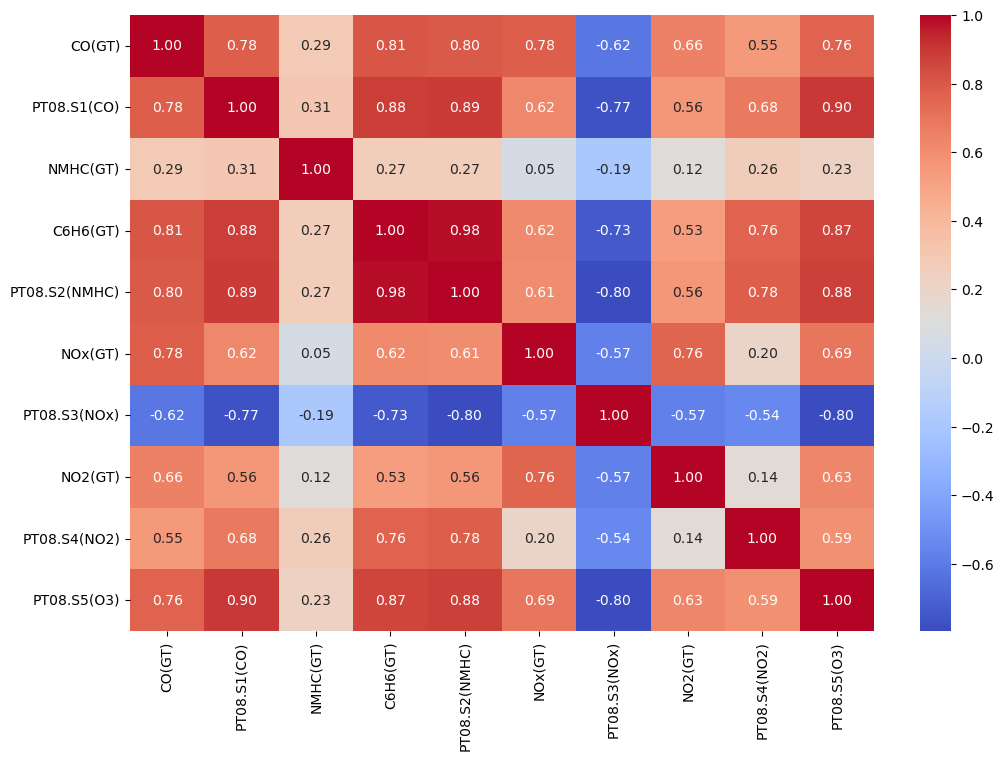

In [206]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [207]:
X = df.drop(columns=["C6H6(GT)", "PT08.S2(NMHC)", "CO(GT)", ])
y = df["C6H6(GT)"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
from xgboost import XGBRegressor
import numpy as np

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"Mean Squared Error: {np.sqrt(mse)}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1.5678722423721514
R^2 Score: 0.9552586229550235
Mean Absolute Error: 1.0925953627906295


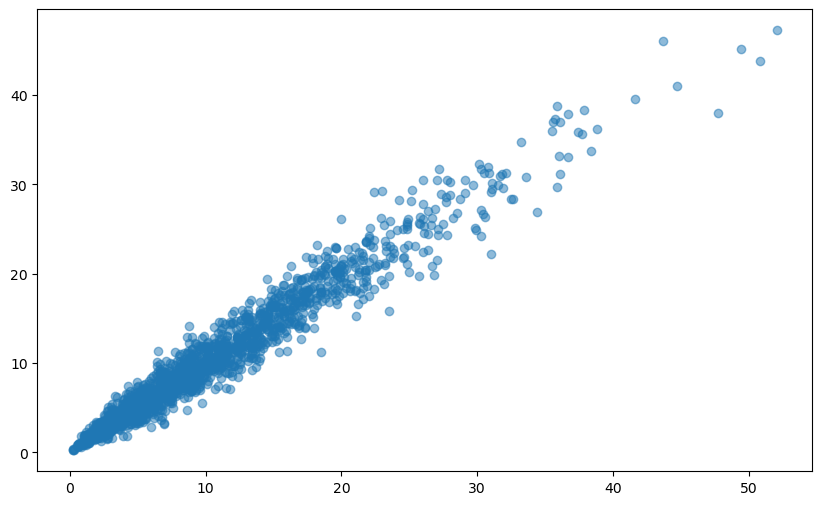

In [210]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.show()

In [211]:
df["C6H6(GT)"].describe()

count    9357.000000
mean       10.009447
std         7.311771
min         0.100000
25%         4.600000
50%         8.200000
75%        13.600000
max        63.700000
Name: C6H6(GT), dtype: float64

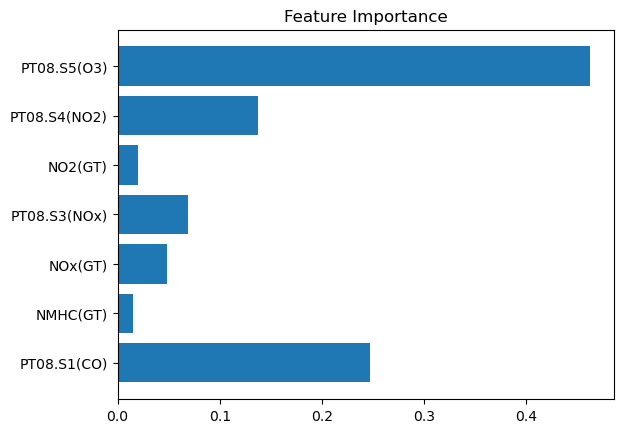

In [212]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()